# Team 1

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook 
Täs o oikei hyvi apuja :)

### EX1, Document the aims, decisions, and solutions of your data analysis directly into the Jupyter Notebook as the analysis proceeds. Make the document self-explanatory. 

### EX2, Divide your dataset into the train and test sets. (No points this time, Kaggle has done this to you).

## Let's get the data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
combine = [train_df, test_df]

### EX3, Describe your data. Calculate statistics, like means, standard deviations, and correlations. Draw diagrams, like histograms, scatter diagrams. Visualize correlations.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


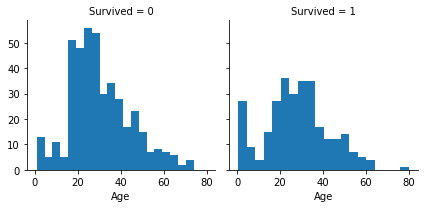

In [6]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### EX4, Prepare your data. When and if necessary, calculate new attributes, scale attributes, convert categorical variables into numeric variables.

### EX5, Train two different classification models. One of them should be Random Forest or SVM. You can select the other one by yourselves.

### EX6, Select one of them for fine-tuning. Justify your selection with the results from suitable evaluation metrics.

### EX7, Use cross-validation in the fine-tuning of your model. Test different hyperparameter combinations.

### EX8, Make predictions on the test set and send them to Kaggle for evaluation. 

### EX9, At the end of your Jupyter Notebook, evaluate how well does the model seem to reach your original aims?